## Welcome to the DEA!

#### There is a new website that has been developed with the Sandbox environment documenting the datasets exposed in the sandbox environment. [Sandbox Explorer](https://explorer.sandbox.dea.ga.gov.au/)

#### DEA uses XArray as its underlying data model and defines a simple querying interface to select satellite data which returns as `Dataset` objects.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import datacube

dc = datacube.Datacube(app='welcome-to-dea')

type(dc)

datacube.api.core.Datacube

#### This `dc` object is the handle to all DEA's functionality. For example to list the products available:

In [3]:
dc.list_products().head()

,name,description,fmask_snow,gqa_final_gcp_count,gqa_error_message,gqa_mean_xy,gqa_abs_iterative_mean_x,eo_sun_elevation,fmask_water,dataset_maturity,...,eo_sun_azimuth,gqa_mean_y,instrument,gqa_abs_x,gqa_stddev_xy,region_code,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,,,,,,,
10,fc_percentile_albers_annual,"Landsat Fractional Cover percentile 25 metre, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"TM,ETM+,OLI",NaN,NaN,NaN,EPSG:3577,"(-25, 25)","(100000.0, 100000.0)","(y, x)"
11,fc_percentile_albers_seasonal,"Landsat Fractional Cover percentile 25 metre, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"TM,ETM+,OLI",NaN,NaN,NaN,EPSG:3577,"(-25, 25)","(100000.0, 100000.0)","(y, x)"
33,ga_ls5t_ard_3,Landsat 5 ARD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,ga_ls7e_ard_3,Landsat 7 ARD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,ga_ls8c_ard_3,Landsat 8 ARD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Still, to select data we have to use numpy indexes. Wouldn't it be convenient to be able to select data from the images using the coordinates of the pixels instead of their relative positions?

#### This is exactly what XArray solves! Let's see how it works:

In [3]:
query={'lat': (-35.25, -35.35),
         'lon': (149.05, 149.17),
         'time':('2010-01-01', '2019-01-15')}

ds = dc.load(product='ls8_nbart_geomedian_annual', **query)

ds

<xarray.Dataset>
Dimensions:  (time: 6, x: 492, y: 500)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2014-01-01 ... 2018-01-01
  * y        (y) float64 -3.953e+06 -3.953e+06 ... -3.966e+06 -3.966e+06
  * x        (x) float64 1.542e+06 1.542e+06 1.542e+06 ... 1.555e+06 1.555e+06
Data variables:
    blue     (time, y, x) int16 372 376 583 591 696 698 ... 591 594 592 601 603
    green    (time, y, x) int16 561 578 803 895 1021 983 ... 818 830 838 849 852
    red      (time, y, x) int16 646 640 799 940 1082 ... 1096 1117 1134 1127
    nir      (time, y, x) int16 2069 2011 2166 2393 2280 ... 2126 2203 2232 2242
    swir1    (time, y, x) int16 1577 1404 1475 1675 1659 ... 3661 3725 3736 3766
    swir2    (time, y, x) int16 1023 941 1066 1119 1160 ... 2594 2665 2677 2676
Attributes:
    crs:      EPSG:3577

#### To explore XArray we have a file containing some reflectance data of Canberra that has been generated using the DEA library.

#### The object that we get `ds` is a XArray `Dataset`, which in some ways is very similar to the dictionary that we created before, but with lots of convenient functionality available.

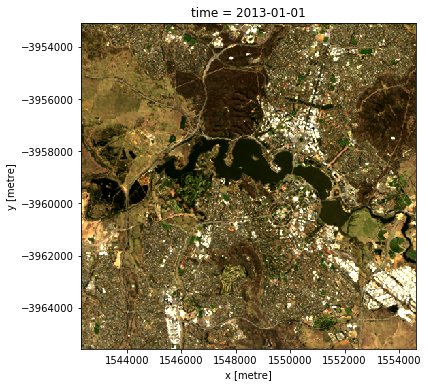

In [5]:
ds[['red', 'green', 'blue']].isel(time=0).to_array().plot.imshow(robust=True, figsize=(6,6))

#### Now that we have access to any location in Australia, select any place that you like in Australia and create a NRG→RGB False colour image, where N is the 'near-infrared' `nir` channel.

_Be careful with the extents in your request. Cubes with sizes 0.1 degree are easily managed by the Sandbox but you can quickly run out of memory if you increase this extent._